Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Mean-Squared-Error (MSE).
Submission File Format
The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221

You can see an example submission file (sample_submission.csv)

# Read The Data Set

In [94]:
from warnings import filterwarnings
filterwarnings("ignore")

In [95]:
import pandas as pd
trd = pd.read_csv("/Users/ABC/Downloads/training_set.csv")
tsd = pd.read_csv("/Users/ABC/Downloads/testing_set.csv")

In [96]:
trd.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
tsd.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Missing Data Treatment

In [98]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
trd.Alley = trd.Alley.fillna("No alley access")
trd.BsmtQual = trd.BsmtQual.fillna("No Basement")
trd.BsmtCond = trd.BsmtCond.fillna("No Basement")
trd.BsmtExposure = trd.BsmtExposure.fillna("No Basement")
trd.BsmtFinType1 = trd.BsmtFinType1.fillna("No Basement")
trd.BsmtFinType2 = trd.BsmtFinType2.fillna("No Basement")
trd.FireplaceQu = trd.FireplaceQu.fillna("No Fireplace")
trd.GarageType = trd.GarageType.fillna("No Garage")
trd.GarageFinish = trd.GarageFinish.fillna("No Garage")
trd.GarageQual = trd.GarageQual.fillna("No Garage")
trd.GarageCond = trd.GarageCond.fillna("No Garage")
trd.PoolQC = trd.PoolQC.fillna("No Pool")
trd.Fence = trd.Fence.fillna("No Fence")
trd.MiscFeature = trd.MiscFeature.fillna("None")

In [100]:
from PM4 import replacer
replacer(trd)

In [101]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [102]:
tsd.Alley = tsd.Alley.fillna("No alley access")
tsd.BsmtQual = tsd.BsmtQual.fillna("No Basement")
tsd.BsmtCond = tsd.BsmtCond.fillna("No Basement")
tsd.BsmtExposure = tsd.BsmtExposure.fillna("No Basement")
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("No Basement")
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("No Basement")
tsd.FireplaceQu = tsd.FireplaceQu.fillna("No Fireplace")
tsd.GarageType = tsd.GarageType.fillna("No Garage")
tsd.GarageFinish = tsd.GarageFinish.fillna("No Garage")
tsd.GarageQual = tsd.GarageQual.fillna("No Garage")
tsd.GarageCond = tsd.GarageCond.fillna("No Garage")
tsd.PoolQC = tsd.PoolQC.fillna("No Pool")
tsd.Fence = tsd.Fence.fillna("No Fence")
tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In [103]:
from PM4 import replacer
replacer(tsd)

In [104]:
trd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500


# EDA

In [105]:
Y = trd[["SalePrice"]]
X = trd.drop(labels=["SalePrice","Id"],axis=1)

from PM8 import ANOVA,chisquare
trd.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [106]:
 for i in trd.columns:
        if(trd[i].dtypes == "object"):
            print("SalePrice vs",i,": --> ",ANOVA(trd,i,"SalePrice"))

SalePrice vs MSZoning : -->  0.0
SalePrice vs Street : -->  0.117
SalePrice vs Alley : -->  0.0
SalePrice vs LotShape : -->  0.0
SalePrice vs LandContour : -->  0.0
SalePrice vs Utilities : -->  0.585
SalePrice vs LotConfig : -->  0.0
SalePrice vs LandSlope : -->  0.141
SalePrice vs Neighborhood : -->  0.0
SalePrice vs Condition1 : -->  0.0
SalePrice vs Condition2 : -->  0.043
SalePrice vs BldgType : -->  0.0
SalePrice vs HouseStyle : -->  0.0
SalePrice vs RoofStyle : -->  0.0
SalePrice vs RoofMatl : -->  0.0
SalePrice vs Exterior1st : -->  0.0
SalePrice vs Exterior2nd : -->  0.0
SalePrice vs MasVnrType : -->  0.0
SalePrice vs ExterQual : -->  0.0
SalePrice vs ExterCond : -->  0.0
SalePrice vs Foundation : -->  0.0
SalePrice vs BsmtQual : -->  0.0
SalePrice vs BsmtCond : -->  0.0
SalePrice vs BsmtExposure : -->  0.0
SalePrice vs BsmtFinType1 : -->  0.0
SalePrice vs BsmtFinType2 : -->  0.0
SalePrice vs Heating : -->  0.001
SalePrice vs HeatingQC : -->  0.0
SalePrice vs CentralAir : --> 

drop unnecessary colummn

In [107]:
X = X.drop(labels=["Utilities","Street"],axis=1)

# Preprocessing

In [108]:
from PM8 import preprocessing
Xnew = preprocessing(X)

# Split

In [109]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Model ols

In [110]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

In [111]:
prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
curr_rsq = model.rsquared_adj
print("Previous:",round(prev_rsq,5),"\tCurrent:",round(curr_rsq,5),"\t",col_to_drop)

Previous: 0.93323 	Current: 0.93323 	 ExterCond_Ex


# check for overfiting

In [112]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)

In [113]:
tr_err

12418.918664383562

In [114]:
ts_err

19508554928235.68

# Regularize

In [115]:
from sklearn.linear_model import Ridge

def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr= model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(ytest,pred_ts)
    print("training error:",tr_err)
    print("validation error:",ts_err)
    print("-------------------------")
    return ts_err

In [116]:
W = []
e = 0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e + 0.001
    

In [117]:
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("------","Alpha",i,"-----------")
    trerr = reg(rr)
    err.append(trerr)

------ Alpha 0.0 -----------
training error: 13202.504280821919
validation error: 4.808912874009577e+16
-------------------------
------ Alpha 0.001 -----------
training error: 12418.342264258934
validation error: 18287.557085186723
-------------------------
------ Alpha 0.002 -----------
training error: 12418.665614386431
validation error: 18286.079813734534
-------------------------
------ Alpha 0.003 -----------
training error: 12419.032364611921
validation error: 18284.607645872817
-------------------------
------ Alpha 0.004 -----------
training error: 12419.39317192481
validation error: 18283.1405079913
-------------------------
------ Alpha 0.005 -----------
training error: 12419.740021264444
validation error: 18281.67830943607
-------------------------
------ Alpha 0.006 -----------
training error: 12420.175153345976
validation error: 18280.220948289032
-------------------------
------ Alpha 0.007 -----------
training error: 12420.595850791015
validation error: 18278.7683157201

training error: 12461.0853129212
validation error: 18242.329824582775
-------------------------
------ Alpha 0.065 -----------
training error: 12462.20624717024
validation error: 18242.00575570301
-------------------------
------ Alpha 0.066 -----------
training error: 12463.318427118538
validation error: 18241.678500195918
-------------------------
------ Alpha 0.067 -----------
training error: 12464.58740957207
validation error: 18241.34811162062
-------------------------
------ Alpha 0.068 -----------
training error: 12466.036727329567
validation error: 18241.01464238308
-------------------------
------ Alpha 0.069 -----------
training error: 12467.474970075515
validation error: 18240.67814377376
-------------------------
------ Alpha 0.07 -----------
training error: 12468.902278205447
validation error: 18240.338666004045
-------------------------
------ Alpha 0.071 -----------
training error: 12470.318788987652
validation error: 18239.99625823983
-------------------------
------ Al

training error: 12562.143005383794
validation error: 18237.54794090162
-------------------------
------ Alpha 0.13 -----------
training error: 12563.814463631767
validation error: 18237.755561857768
-------------------------
------ Alpha 0.131 -----------
training error: 12565.478136063419
validation error: 18237.958967043003
-------------------------
------ Alpha 0.132 -----------
training error: 12567.132507062468
validation error: 18238.158196239394
-------------------------
------ Alpha 0.133 -----------
training error: 12568.777654022555
validation error: 18238.353288740895
-------------------------
------ Alpha 0.134 -----------
training error: 12570.413653401692
validation error: 18238.544312927523
-------------------------
------ Alpha 0.135 -----------
training error: 12572.048025910814
validation error: 18238.810150259258
-------------------------
------ Alpha 0.136 -----------
training error: 12573.68876251755
validation error: 18239.07157027909
-------------------------
---

training error: 12669.2758703197
validation error: 18285.562035196886
-------------------------
------ Alpha 0.198 -----------
training error: 12670.786476749337
validation error: 18286.53509660783
-------------------------
------ Alpha 0.199 -----------
training error: 12672.290234780137
validation error: 18287.512421253996
-------------------------
------ Alpha 0.2 -----------
training error: 12673.80312041833
validation error: 18288.483866352013
-------------------------
------ Alpha 0.201 -----------
training error: 12675.329633915442
validation error: 18289.558055108286
-------------------------
------ Alpha 0.202 -----------
training error: 12676.85389148494
validation error: 18290.688548446902
-------------------------
------ Alpha 0.203 -----------
training error: 12678.382525716168
validation error: 18291.81284649847
-------------------------
------ Alpha 0.204 -----------
training error: 12679.904378254936
validation error: 18292.93098795978
-------------------------
------ A

training error: 12772.318264350546
validation error: 18355.160347759575
-------------------------
------ Alpha 0.264 -----------
training error: 12773.901160418647
validation error: 18356.222835133147
-------------------------
------ Alpha 0.265 -----------
training error: 12775.493007281564
validation error: 18357.2802713307
-------------------------
------ Alpha 0.266 -----------
training error: 12777.078970634113
validation error: 18358.332683745168
-------------------------
------ Alpha 0.267 -----------
training error: 12778.65908271993
validation error: 18359.380099572372
-------------------------
------ Alpha 0.268 -----------
training error: 12780.23337553872
validation error: 18360.42254581275
-------------------------
------ Alpha 0.269 -----------
training error: 12781.801880848798
validation error: 18361.46004927322
-------------------------
------ Alpha 0.27 -----------
training error: 12783.364630169292
validation error: 18362.492636568884
-------------------------
------

training error: 12873.534676481868
validation error: 18421.353624863368
-------------------------
------ Alpha 0.328 -----------
training error: 12875.077146800759
validation error: 18422.51694274046
-------------------------
------ Alpha 0.329 -----------
training error: 12876.614729324614
validation error: 18423.675789947152
-------------------------
------ Alpha 0.33 -----------
training error: 12878.147447151325
validation error: 18424.830187334745
-------------------------
------ Alpha 0.331 -----------
training error: 12879.675323228266
validation error: 18425.9801556226
-------------------------
------ Alpha 0.332 -----------
training error: 12881.198380353599
validation error: 18427.12571539964
-------------------------
------ Alpha 0.333 -----------
training error: 12882.716641177538
validation error: 18428.266887124926
-------------------------
------ Alpha 0.334 -----------
training error: 12884.230128203535
validation error: 18429.403691129057
-------------------------
----

training error: 12967.16354058518
validation error: 18488.49984935617
-------------------------
------ Alpha 0.393 -----------
training error: 12968.513575737226
validation error: 18489.41083038158
-------------------------
------ Alpha 0.394 -----------
training error: 12969.859782319776
validation error: 18490.318462190437
-------------------------
------ Alpha 0.395 -----------
training error: 12971.202176386894
validation error: 18491.22275889233
-------------------------
------ Alpha 0.396 -----------
training error: 12972.540773900071
validation error: 18492.12373451685
-------------------------
------ Alpha 0.397 -----------
training error: 12973.875590728934
validation error: 18493.021403014034
-------------------------
------ Alpha 0.398 -----------
training error: 12975.20664265189
validation error: 18493.915778255057
-------------------------
------ Alpha 0.399 -----------
training error: 12976.533945356865
validation error: 18494.80687403264
-------------------------
------

training error: 13049.135569404938
validation error: 18542.00088772652
-------------------------
------ Alpha 0.458 -----------
training error: 13050.331235091018
validation error: 18542.73507300626
-------------------------
------ Alpha 0.459 -----------
training error: 13051.534288866505
validation error: 18543.46664386485
-------------------------
------ Alpha 0.46 -----------
training error: 13052.739367266247
validation error: 18544.195610342846
-------------------------
------ Alpha 0.461 -----------
training error: 13053.941357441736
validation error: 18544.921982429103
-------------------------
------ Alpha 0.462 -----------
training error: 13055.140271030268
validation error: 18545.645770061255
-------------------------
------ Alpha 0.463 -----------
training error: 13056.33611960896
validation error: 18546.366983125932
-------------------------
------ Alpha 0.464 -----------
training error: 13057.528914695195
validation error: 18547.0856314591
-------------------------
------

training error: 13126.646255396383
validation error: 18587.680577360887
-------------------------
------ Alpha 0.525 -----------
training error: 13127.76596371209
validation error: 18588.293334340906
-------------------------
------ Alpha 0.526 -----------
training error: 13128.883026368574
validation error: 18588.903976969137
-------------------------
------ Alpha 0.527 -----------
training error: 13129.997452483754
validation error: 18589.512512726516
-------------------------
------ Alpha 0.528 -----------
training error: 13131.109251132571
validation error: 18590.118949058742
-------------------------
------ Alpha 0.529 -----------
training error: 13132.218431347257
validation error: 18590.723293376494
-------------------------
------ Alpha 0.53 -----------
training error: 13133.325002117585
validation error: 18591.32555305575
-------------------------
------ Alpha 0.531 -----------
training error: 13134.428972391099
validation error: 18591.92573543789
-------------------------
---

training error: 13197.396450260869
validation error: 18624.393757054026
-------------------------
------ Alpha 0.592 -----------
training error: 13198.378979163484
validation error: 18624.879854872575
-------------------------
------ Alpha 0.593 -----------
training error: 13199.359352317026
validation error: 18625.364270784172
-------------------------
------ Alpha 0.594 -----------
training error: 13200.337576555765
validation error: 18625.8470103129
-------------------------
------ Alpha 0.595 -----------
training error: 13201.313658684407
validation error: 18626.32807895892
-------------------------
------ Alpha 0.596 -----------
training error: 13202.289377931102
validation error: 18626.80748219869
-------------------------
------ Alpha 0.597 -----------
training error: 13203.27441824417
validation error: 18627.285225484884
-------------------------
------ Alpha 0.598 -----------
training error: 13204.257320355771
validation error: 18627.761314246683
-------------------------
----

training error: 13262.400204488575
validation error: 18663.5929647096
-------------------------
------ Alpha 0.66 -----------
training error: 13263.32453147461
validation error: 18664.13673663806
-------------------------
------ Alpha 0.661 -----------
training error: 13264.248570153028
validation error: 18664.678975269417
-------------------------
------ Alpha 0.662 -----------
training error: 13265.177775352475
validation error: 18665.21968504392
-------------------------
------ Alpha 0.663 -----------
training error: 13266.105117381838
validation error: 18665.758870384823
-------------------------
------ Alpha 0.664 -----------
training error: 13267.030601672295
validation error: 18666.29653569823
-------------------------
------ Alpha 0.665 -----------
training error: 13267.954233633442
validation error: 18666.832685373374
-------------------------
------ Alpha 0.666 -----------
training error: 13268.876018653318
validation error: 18667.367323782557
-------------------------
------

training error: 13318.738517080674
validation error: 18696.317024765656
-------------------------
------ Alpha 0.724 -----------
training error: 13319.576766009983
validation error: 18696.836914345764
-------------------------
------ Alpha 0.725 -----------
training error: 13320.415776270087
validation error: 18697.35542783356
-------------------------
------ Alpha 0.726 -----------
training error: 13321.253236445637
validation error: 18697.87256893446
-------------------------
------ Alpha 0.727 -----------
training error: 13322.089150718148
validation error: 18698.38834134063
-------------------------
------ Alpha 0.728 -----------
training error: 13322.923523253688
validation error: 18698.902748731067
-------------------------
------ Alpha 0.729 -----------
training error: 13323.756358202914
validation error: 18699.41579477159
-------------------------
------ Alpha 0.73 -----------
training error: 13324.587659701168
validation error: 18699.939302874485
-------------------------
----

training error: 13369.564428641934
validation error: 18728.465938648045
-------------------------
------ Alpha 0.788 -----------
training error: 13370.313377010782
validation error: 18728.93489531184
-------------------------
------ Alpha 0.789 -----------
training error: 13371.061011212898
validation error: 18729.40263801595
-------------------------
------ Alpha 0.79 -----------
training error: 13371.807334583595
validation error: 18729.869169868853
-------------------------
------ Alpha 0.791 -----------
training error: 13372.556085757038
validation error: 18730.33449396833
-------------------------
------ Alpha 0.792 -----------
training error: 13373.304743816949
validation error: 18730.79861340187
-------------------------
------ Alpha 0.793 -----------
training error: 13374.05209710585
validation error: 18731.261531246415
-------------------------
------ Alpha 0.794 -----------
training error: 13374.7981489172
validation error: 18731.72325056857
-------------------------
------ A

training error: 13416.541648969791
validation error: 18756.552095089464
-------------------------
------ Alpha 0.853 -----------
training error: 13417.237025045968
validation error: 18756.948179262447
-------------------------
------ Alpha 0.854 -----------
training error: 13417.931253911765
validation error: 18757.343231475563
-------------------------
------ Alpha 0.855 -----------
training error: 13418.624338290458
validation error: 18757.737254238473
-------------------------
------ Alpha 0.856 -----------
training error: 13419.316280896463
validation error: 18758.130250052785
-------------------------
------ Alpha 0.857 -----------
training error: 13420.007084435389
validation error: 18758.522221412084
-------------------------
------ Alpha 0.858 -----------
training error: 13420.696751604084
validation error: 18758.91317080214
-------------------------
------ Alpha 0.859 -----------
training error: 13421.385285090637
validation error: 18759.3031007007
-------------------------
--

training error: 13459.22769040493
validation error: 18779.920762023856
-------------------------
------ Alpha 0.917 -----------
training error: 13459.868424324044
validation error: 18780.255546134482
-------------------------
------ Alpha 0.918 -----------
training error: 13460.508153104825
validation error: 18780.58944402198
-------------------------
------ Alpha 0.919 -----------
training error: 13461.146879002223
validation error: 18780.92245774309
-------------------------
------ Alpha 0.92 -----------
training error: 13461.784604264274
validation error: 18781.254589348275
-------------------------
------ Alpha 0.921 -----------
training error: 13462.421331132166
validation error: 18781.585840881846
-------------------------
------ Alpha 0.922 -----------
training error: 13463.057061840178
validation error: 18781.916214381927
-------------------------
------ Alpha 0.923 -----------
training error: 13463.691798615795
validation error: 18782.245711880532
-------------------------
---

training error: 13500.789700374164
validation error: 18800.765516884065
-------------------------
------ Alpha 0.985 -----------
training error: 13501.376480435902
validation error: 18801.04442998711
-------------------------
------ Alpha 0.986 -----------
training error: 13501.962382779266
validation error: 18801.32258368205
-------------------------
------ Alpha 0.987 -----------
training error: 13502.547409267952
validation error: 18801.599979652365
-------------------------
------ Alpha 0.988 -----------
training error: 13503.13156176026
validation error: 18801.87661957669
-------------------------
------ Alpha 0.989 -----------
training error: 13503.714842109093
validation error: 18802.152505128906
-------------------------
------ Alpha 0.99 -----------
training error: 13504.29725216204
validation error: 18802.427637978097
-------------------------
------ Alpha 0.991 -----------
training error: 13504.878793761307
validation error: 18802.702019788612
-------------------------
-----

0.124

In [118]:
err

[4.808912874009577e+16,
 18287.557085186723,
 18286.079813734534,
 18284.607645872817,
 18283.1405079913,
 18281.67830943607,
 18280.220948289032,
 18278.768315720186,
 18277.32029925547,
 18275.876785217435,
 18274.437660531934,
 18273.002814047904,
 18271.953745757433,
 18270.93556156475,
 18269.917119057536,
 18268.898483320216,
 18267.879710714715,
 18266.860850368717,
 18265.841945402834,
 18264.823033944227,
 18263.804149968288,
 18262.78532399708,
 18261.76658367841,
 18260.747954266044,
 18259.729459021797,
 18258.711119545686,
 18257.93879846919,
 18257.18375609396,
 18256.426858934534,
 18255.804954158953,
 18255.302512920738,
 18254.796355392544,
 18254.286574751975,
 18253.773260302114,
 18253.256497775485,
 18252.736369603794,
 18252.212955159957,
 18251.68633097485,
 18251.15657093242,
 18250.62374644336,
 18250.136138532253,
 18249.691494603783,
 18249.24327792508,
 18248.791565686683,
 18248.336432721746,
 18247.87795163281,
 18247.548935211533,
 18247.29299574087,
 182

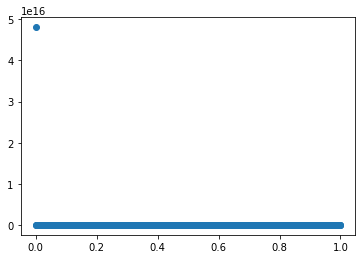

In [119]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

# Train the selected regularized model

In [120]:
rr = Ridge(alpha=0.124)
model = rr.fit(Xnew,Y)

# prepaer test data

In [121]:
xtest = preprocessing(tsd)

In [123]:
xtest[Xnew.columns]

KeyError: "['Exterior1st_ImStucc', 'Heating_Floor', 'HouseStyle_2.5Fin', 'GarageQual_Ex', 'MiscFeature_TenC', 'Exterior1st_Stone', 'PoolQC_Fa', 'RoofMatl_Membran', 'Electrical_Mix', 'RoofMatl_ClyTile', 'Heating_OthW', 'Condition2_RRNn', 'Exterior2nd_Other', 'RoofMatl_Roll', 'RoofMatl_Metal', 'Condition2_RRAn', 'Condition2_RRAe'] not in index"

In [127]:
r = ['Exterior1st_ImStucc', 'Heating_Floor', 'HouseStyle_2.5Fin', 'GarageQual_Ex', 'MiscFeature_TenC', 'Exterior1st_Stone', 'PoolQC_Fa', 'RoofMatl_Membran', 'Electrical_Mix', 'RoofMatl_ClyTile', 'Heating_OthW', 'Condition2_RRNn', 'Exterior2nd_Other', 'RoofMatl_Roll', 'RoofMatl_Metal', 'Condition2_RRAn', 'Condition2_RRAe'] 

In [128]:
for i in r:
    xtest[i]=0

In [129]:
xfinal = xtest[Xnew.columns]

In [131]:
pred_final=model.predict(xfinal)

In [144]:
final_sub = tsd[["Id"]]
final_sub["SalePrice"] = pred_final

In [145]:
final_sub.to_csv("Desktop/submission.csv",index=None)